In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import xarray as xr
import time #useful for timing functions
import sys
import glob #glob is helpful for searching for filenames or directories
import scipy #scientific python
import pickle #for saving data
import skimage
from skimage import io
from importlib import reload

sys.path.append("../PyDDM")
import ddm_analysis_and_fitting as ddm

In [2]:
path_to_example_file = "C:/Users/Ryan/Documents/GitHub/DDM-at-USD/ExampleData/"
data_filenm = "ddm_matrix_images_nobin_40x_128x128_8bit.nc"
ddm_analysis_dataset = xr.open_dataset(path_to_example_file + data_filenm)
ddm_analysis_dataset.close()
display(ddm_analysis_dataset)

<xarray.Dataset>
Dimensions:         (time: 30, q_y: 128, q_x: 128, q: 64)
Coordinates:
  * time            (time) float64 0.02398 0.04796 0.07194 ... 9.856 11.92 14.39
    framelag        (time) int32 ...
  * q_y             (q_y) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q_x             (q_x) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q               (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    ravs            (time, q) float64 ...
    av_fft_offrame  (q) float64 ...
    B               float64 ...
    B_std           float64 ...
    amplitude       (q) float64 ...
    ISF             (time, q) float64 ...
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/Ryan/Documents/GitHub/DDM-at-USD/Exampl...
    FileName:                images_nobin_40x_128x128_8bit.tif
    ...                      ...
    last_lag_time:           600
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  yes
    binning:                 no
    bin_size:                2

### Looking at the dimensions of our dataset

In [3]:
ddm_analysis_dataset.time

<xarray.DataArray 'time' (time: 30)>
array([ 0.023981,  0.047962,  0.071942,  0.095923,  0.119904,  0.143885,
        0.167866,  0.215827,  0.263789,  0.311751,  0.383693,  0.479616,
        0.57554 ,  0.695444,  0.839329,  1.031175,  1.223022,  1.486811,
        1.798561,  2.182254,  2.63789 ,  3.189448,  3.83693 ,  4.652278,
        5.611511,  6.76259 ,  8.177458,  9.856115, 11.918465, 14.388489])
Coordinates:
  * time      (time) float64 0.02398 0.04796 0.07194 ... 9.856 11.92 14.39
    framelag  (time) int32 1 2 3 4 5 6 7 9 ... 160 194 234 282 341 411 497 600

### Looking at the ISF

In [4]:
display(ddm_analysis_dataset.ISF)

<xarray.DataArray 'ISF' (time: 30, q: 64)>
array([[  0.999913,   0.999914,   0.999889, ...,  -3.538216,  -4.084247,
         -2.606241],
       [  0.999913,   0.999912,   0.999853, ...,  -3.330409,  -3.662044,
         -2.390597],
       [  0.999912,   0.99991 ,   0.999824, ...,  -3.170939,  -3.536439,
         -2.268747],
       ...,
       [  0.98634 ,   0.986488,   0.985221, ..., -11.013132, -11.456455,
         -5.752458],
       [  0.983711,   0.984126,   0.984202, ...,   4.571013,  -0.797551,
         -2.24158 ],
       [  0.978435,   0.97882 ,   0.978227, ...,   3.042446,   5.906712,
          2.521323]])
Coordinates:
  * time      (time) float64 0.02398 0.04796 0.07194 ... 9.856 11.92 14.39
    framelag  (time) int32 1 2 3 4 5 6 7 9 ... 160 194 234 282 341 411 497 600
  * q         (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.17 12.37 12.58 12.78

<xarray.DataArray 'ISF' (time: 30)>
array([ 0.953462,  0.896135,  0.842921,  0.792188,  0.74651 ,  0.700857,
        0.658555,  0.583468,  0.514517,  0.454624,  0.38674 ,  0.311892,
        0.243127,  0.190201,  0.127034,  0.080039,  0.045515, -0.034765,
       -0.038966, -0.029656,  0.037465,  0.038745,  0.064247, -0.060606,
       -0.02857 , -0.05694 , -0.061376, -0.080437, -0.086823,  0.010847])
Coordinates:
  * time      (time) float64 0.02398 0.04796 0.07194 ... 9.856 11.92 14.39
    framelag  (time) int32 1 2 3 4 5 6 7 9 ... 160 194 234 282 341 411 497 600
    q         float64 2.028

<IPython.core.display.Javascript object>


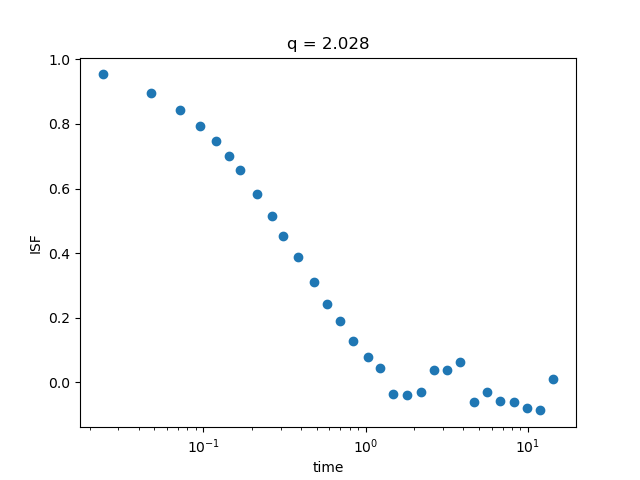

<IPython.core.display.Javascript object>


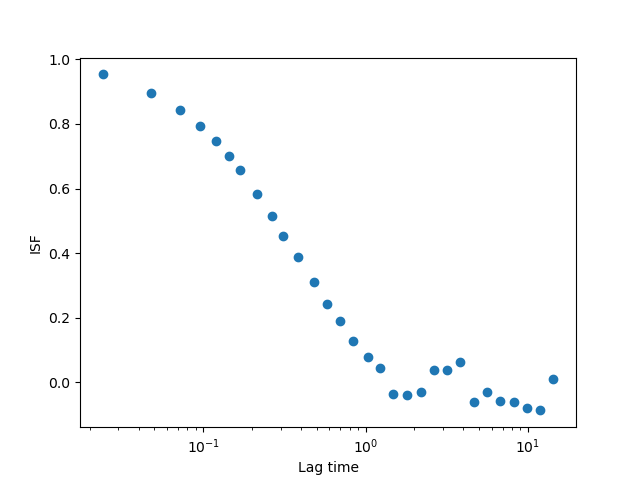

Text(0, 0.5, 'ISF')

In [5]:
#Selecting the 11th q value
ISF_for_given_q = ddm_analysis_dataset.ISF.isel(q=10)
display(ISF_for_given_q)

#A couple ways we could plot
ddm_analysis_dataset.ISF.isel(q=10).plot(xscale='log', marker='o', ls='none')

fig,ax = plt.subplots()
ax.semilogx(ddm_analysis_dataset.time, ddm_analysis_dataset.ISF.isel(q=10), 'o')
ax.set_xlabel("Lag time")
ax.set_ylabel("ISF")

<xarray.DataArray 'ISF' (time: 30)>
array([ 0.953462,  0.896135,  0.842921,  0.792188,  0.74651 ,  0.700857,
        0.658555,  0.583468,  0.514517,  0.454624,  0.38674 ,  0.311892,
        0.243127,  0.190201,  0.127034,  0.080039,  0.045515, -0.034765,
       -0.038966, -0.029656,  0.037465,  0.038745,  0.064247, -0.060606,
       -0.02857 , -0.05694 , -0.061376, -0.080437, -0.086823,  0.010847])
Coordinates:
  * time      (time) float64 0.02398 0.04796 0.07194 ... 9.856 11.92 14.39
    framelag  (time) int32 1 2 3 4 5 6 7 9 ... 160 194 234 282 341 411 497 600
    q         float64 2.028

<IPython.core.display.Javascript object>


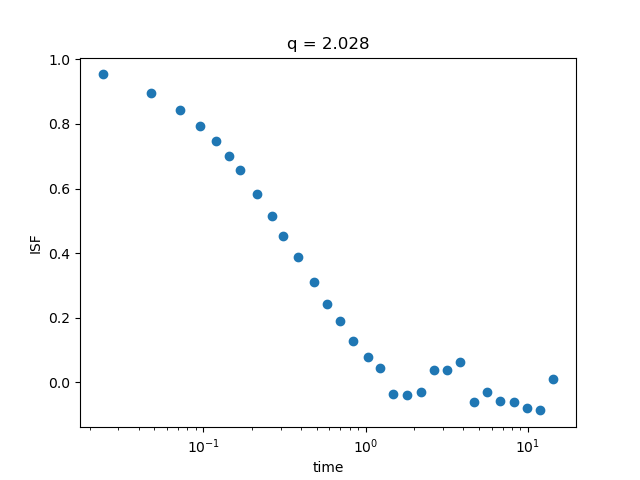

In [6]:
#Selecting the q value closest to 2 um^-1
ISF_for_given_q = ddm_analysis_dataset.ISF.sel(q=2, method='nearest')
display(ISF_for_given_q)

plt.figure()
ddm_analysis_dataset.ISF.sel(q=2, method='nearest').plot(xscale='log', marker='o', ls='none', ax=None)


### Plotting multiple lines

<IPython.core.display.Javascript object>


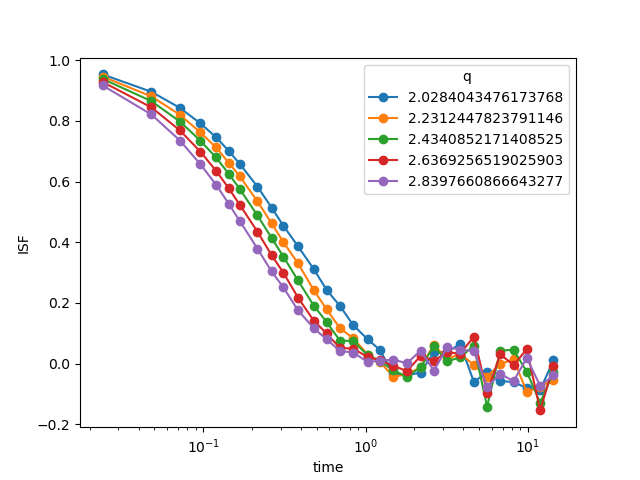

In [7]:
plt.figure()

#Get ISFs for all q values between 2 and 3
ddm_analysis_dataset.ISF.sel(q=slice(2,3)).plot.line(marker='o', ls='-', x='time', xscale='log')

## Working with Pandas

In [8]:
ddm_analysis_dataset.ISF.to_pandas()

q,0.000000,0.202840,0.405681,0.608521,0.811362,1.014202,1.217043,1.419883,1.622723,1.825564,...,10.953383,11.156224,11.359064,11.561905,11.764745,11.967586,12.170426,12.373267,12.576107,12.778947
time,,,,,,,,,,,,,,,,,,,,,
0.023981,0.999913,0.999914,0.999889,0.998664,0.986764,0.983769,0.979856,0.974406,0.967716,0.960874,...,2.773063,4.883024,4.901297,6.768392,-6.262891,-2.970112,-3.395037,-3.538216,-4.084247,-2.606241
0.047962,0.999913,0.999912,0.999853,0.997257,0.971673,0.964382,0.955247,0.942888,0.927840,0.912611,...,2.558803,4.324196,4.538740,6.213718,-6.284424,-2.942661,-3.338608,-3.330409,-3.662044,-2.390597
0.071942,0.999912,0.999910,0.999824,0.996095,0.957940,0.946252,0.931776,0.912733,0.890204,0.867453,...,2.683023,4.578957,4.957924,6.666888,-5.251241,-2.125635,-2.586076,-3.170939,-3.536439,-2.268747
0.095923,0.999826,0.999826,0.999730,0.995007,0.945000,0.929066,0.909444,0.884170,0.855043,0.824422,...,2.900657,5.125395,4.794643,6.127018,-4.761660,-2.018427,-3.091010,-3.023769,-2.754038,-1.979601
0.119904,0.999825,0.999824,0.999716,0.994267,0.933971,0.913117,0.887569,0.855811,0.819826,0.783816,...,2.399946,4.397000,4.865177,6.488678,-5.152035,-2.484332,-3.071968,-3.153849,-3.268005,-2.448468
0.143885,0.999827,0.999825,0.999697,0.993366,0.921897,0.897215,0.867791,0.830517,0.789371,0.746454,...,2.646417,4.722634,4.431001,6.247081,-6.324906,-3.286882,-3.605917,-3.372028,-2.506766,-1.768740
0.167866,0.999740,0.999739,0.999606,0.992713,0.912397,0.881766,0.847100,0.805836,0.758928,0.708709,...,2.044663,3.781251,3.621793,4.548229,-4.662520,-2.443099,-2.731810,-3.158844,-3.253513,-2.101682
0.215827,0.999738,0.999737,0.999577,0.991177,0.890113,0.851953,0.807310,0.755379,0.700789,0.644086,...,2.767070,3.453568,3.810802,6.202391,-6.915032,-3.018900,-1.785801,-1.850998,-2.992178,-2.107122
0.263789,0.999654,0.999655,0.999488,0.990069,0.873248,0.825878,0.774273,0.711141,0.643764,0.580464,...,2.131354,4.058568,4.527394,6.451369,-4.995918,-1.232986,-1.625530,-2.621520,-3.208562,-2.108804


## Renaming Variables

In [9]:
ddm_analysis_dataset.rename_vars({'ravs':'test'})

<xarray.Dataset>
Dimensions:         (time: 30, q_y: 128, q_x: 128, q: 64)
Coordinates:
  * time            (time) float64 0.02398 0.04796 0.07194 ... 9.856 11.92 14.39
    framelag        (time) int32 1 2 3 4 5 6 7 9 ... 194 234 282 341 411 497 600
  * q_y             (q_y) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q_x             (q_x) float64 -12.98 -12.78 -12.58 ... 12.37 12.58 12.78
  * q               (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    test            (time, q) float64 725.5 266.1 42.08 ... 13.6 13.79 13.61
    av_fft_offrame  (q) float64 4.099e+06 1.465e+06 1.294e+05 ... 6.681 6.66
    B               float64 13.43
    B_std           float64 0.08748
    amplitude       (q) float64 8.199e+06 2.93e+06 ... -0.07178 -0.1137
    ISF             (time, q) float64 0.9999 0.9999 0.9999 ... 3.042 5.907 2.521
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/Ryan/Documents/GitHub/DDM-at-USD/Exampl...
    FileName:                images_nobin_40x_128x128_8bit.tif
    ...                      ...
    last_lag_time:           600
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  yes
    binning:                 no
    bin_size:                2

## Performing fit...

In [43]:
reload(ddm)

<module 'ddm_analysis_and_fitting' from '../PyDDM\\ddm_analysis_and_fitting.py'>

In [44]:
path_to_yaml = "C:/Users/Ryan/Documents/GitHub/DDM-at-USD/Class-based framework/"
yaml_filenm = "example_data.yml"
ddm_fits = ddm.DDM_Fit(path_to_yaml + yaml_filenm)

,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.500,1.1


Loading file C:/Users/Ryan/Documents/GitHub/DDM-at-USD/ExampleData/images_nobin_40x_128x128_8bit_ddmmatrix.nc ...


In [45]:
fit01 = ddm_fits.fit(display_table=False)

In function ddm_fit.get_tau_vs_q_fit, using new tau...
Under what name would you want to save the generated fit: fit01
Fit is saved in fittings dictionary with key 'fit01'.


In [48]:
%matplotlib inline
ddm_fits.fit_report(fit_results = 'fit01', show=False)

In function ddm_fit.get_tau_vs_q_fit, using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


In [32]:
ddm_fits.save_fits_disk('fit03', save_directory="./", file_type='netcdf', fit_fname_end = 'testing')

The key fit03 was not found in self.fittings.
Available keys are:  ['fit01']


In [55]:
'isf_data' in fit01.data_vars

True

In [61]:
fit01

<xarray.Dataset>
Dimensions:          (parameter: 4, q: 64, lagtime: 40)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2028 0.4057 0.6085 ... 12.37 12.58 12.78
  * lagtime          (lagtime) float64 0.02398 0.04796 0.07194 ... 12.59 14.39
Data variables:
    parameters       (parameter, q) float64 1.0 5.011e+03 ... 0.9071 0.9847
    theory           (lagtime, q) float64 0.001311 364.5 349.5 ... 206.3 206.4
    isf_data         (lagtime, q) float64 0.0 0.9997 0.9894 ... -2.397 -2.196
    ddm_matrix_data  (lagtime, q) float64 0.0 294.2 321.4 ... 209.4 201.2 205.7
    A                (q) float64 -212.9 2.585e+05 1.024e+04 ... -3.434 -2.255
    B                float64 212.9
Attributes:
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      0.6241214765261827
    tau_vs_q_slope:                 [-1.9357304]
    msd_alpha:                      [1.03320173]
    msd_effective_diffusion_coeff:  [0.614429]
    diffusion_coeff:                0.600673588151076
    diffusion_coeff_std:            0.041020075785940815
    velocity:                       1.205885034971004
    velocity_std:                   0.4808141805169979
    good_q_range:                   [4, 19]

I want to open two analysis files and average together the DDM matrices (or radial averages). 

In [2]:
data_path = "Y:\\Ryan McGorty\\2021-11-12_SilicaRods60x\\images_2\\"
data_file_1 = "ddm_matrix_images_2_gradientsquaredX.nc"
data_file_2 = "ddm_matrix_images_2_gradientsquaredY.nc"

data1 = xr.open_dataset(data_path+data_file_1)
data2 = xr.open_dataset(data_path+data_file_2)

In [3]:
data1

<xarray.Dataset>
Dimensions:         (time: 200, q_y: 256, q_x: 256, q: 128)
Coordinates:
  * time            (time) float64 0.01241 0.02481 0.03722 ... 58.41 60.2 62.03
    framelag        (time) int32 ...
  * q_y             (q_y) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q_x             (q_x) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q               (q) float64 0.0 0.1136 0.2273 0.3409 ... 14.2 14.32 14.43
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    ravs            (time, q) float64 ...
    av_fft_offrame  (q) float64 ...
    B               float64 ...
    B_std           float64 ...
    Amplitude       (q) float64 ...
    ISF             (time, q) float64 ...
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/svc-scst255lab/Documents/Ryan/2021-11-1...
    FileName:                images_2_gradientsquaredX.tif
    ...                      ...
    last_lag_time:           5000
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2

In [53]:
combo = data1.copy()

In [54]:
combo['ravs'] = 0.5*(data1.ravs + data2.ravs)

In [61]:
combo['Amplitude'] = 0.5*(data1.Amplitude + data2.Amplitude)

In [63]:
combo['B'] = 0.5*(data1.B + data2.B)

In [64]:
combo['ISF'] = 0.5*(data1.ISF + data2.ISF)

<IPython.core.display.Javascript object>


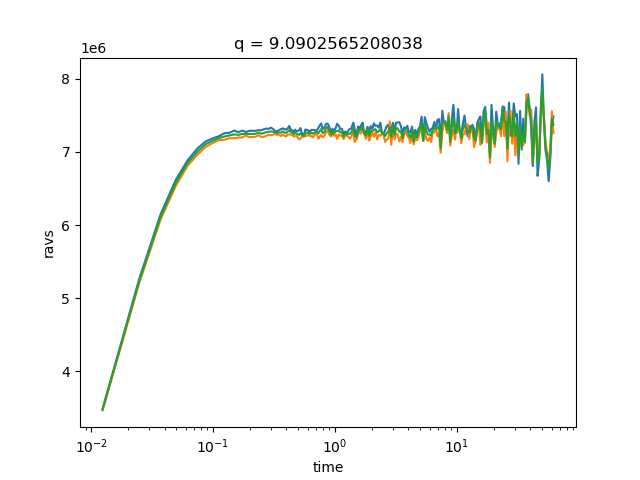

[]

In [56]:
qval = 80
data1.ravs.isel(q=qval).plot()
data2.ravs.isel(q=qval).plot()
combo.ravs.isel(q=qval).plot()
plt.semilogx()

In [57]:
combo.attrs['FileName'] = "%s and %s" % (data1.FileName, data2.FileName)

In [58]:
combo

<xarray.Dataset>
Dimensions:         (time: 200, q_y: 256, q_x: 256, q: 128)
Coordinates:
  * time            (time) float64 0.01241 0.02481 0.03722 ... 58.41 60.2 62.03
    framelag        (time) int32 1 2 3 4 5 6 7 ... 4303 4434 4569 4708 4852 5000
  * q_y             (q_y) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q_x             (q_x) float64 -14.54 -14.43 -14.32 ... 14.2 14.32 14.43
  * q               (q) float64 0.0 0.1136 0.2273 0.3409 ... 14.2 14.32 14.43
Data variables:
    ddm_matrix      (time, q_y, q_x) float64 ...
    ravs            (time, q) float64 6.164e+06 6.148e+06 ... 7.544e+06
    av_fft_offrame  (q) float64 4.379e+10 6.57e+07 ... 3.845e+06 3.707e+06
    B               float64 7.681e+06
    B_std           float64 9.631e+04
    Amplitude       (q) float64 8.758e+10 1.237e+08 ... 8.594e+03 -2.662e+05
    ISF             (time, q) float64 1.0 1.013 1.013 ... 3.681 -27.64 0.3207
Attributes: (12/18)
    units:                   Intensity
    time:                    sec or frame number
    q:                       μm$^-$$^1$
    info:                    ddm_matrix is the averages of FFT difference ima...
    DataDirectory:           C:/Users/svc-scst255lab/Documents/Ryan/2021-11-1...
    FileName:                images_2_gradientsquaredX.tif and images_2_gradi...
    ...                      ...
    last_lag_time:           5000
    crop_to_roi:             no
    split_into_4_rois:       no
    use_windowing_function:  no
    binning:                 no
    bin_size:                2

In [65]:
combo.to_netcdf(data_path + "ddm_matrix_images_2_gradientsquaredXY.nc")

In [66]:
combo.close()